# Merging Feature matrix 

from multifeature (single habitat)

In [ ]:
pip install -r ./Radiomics_texture/pyrad_requeriments.txt

In [186]:
!python --version

Python 3.10.12


In [1]:
import json
import pandas as pd
from Radiomics_texture.pyrad_utils import *

In [2]:
with open('./Radiomics_texture/pyradiomics_setup.json', 'r') as f:
    data_params = json.load(f)

In [4]:
# update params : folder estructure
data_params['tp']="tp1"
data_params['root_path']='/app/Data/_Brain/Radiology/_Adult/_Glioma/'
data_params['output_fmatrix']='Feature_extraction/Feature_matrix'
data_params['mat_str']="pp2.csv" # unannotated feature matrix

# multifeature_merge

In [ ]:
# main setup
data_params['mri_data']="site1"
features_to_merge=["feat4"] # # target info to merge
out_tag='TextureShapeBioM' # # merged feature Tag

# loop on 
labels=["RoI1"]
modalities=["T2","T1c","FLAIR"]

# adding modality and habitat-free features
shape_features=True
BioM_features=True
Democlinical_vars=False
get_csvfile=False

"\nEnable multifeature_merge(write_csv=True) to save csv file (deafult : False)"

df_dims=[]
for tumor_rois in labels:
    for mri_mod_merge in modalities:
        Wrapper=Wrap_Features(**data_params)
        
        df_merged=Wrapper.multifeature_merge(tumor_rois, features_to_merge, mri_mod_merge, out_tag,
                                             include_biomodel=BioM_features, include_all_shape=shape_features, include_clinics=Democlinical_vars, write_csv=get_csvfile)
        
        df_annotated=Wrapper.annotated_matrix(df_merged, Wrapper, include_clinics=Democlinical_vars, write_csv=get_csvfile)
        print(f"\n >>>>>>>>>>>>>>> Done it for {tumor_rois} , {mri_mod_merge}")
        print(f"\n")
        df_dims.append(df_annotated.shape)

np.vstack(df_dims)

# multihabitat_merge

In [ ]:
# main set
data_params['mri_data']="site5"
labels=["RoI1","RoI2"] # # target info to merge
out_tag='All_tumor' # merged Tumor habitat Tag

# loop on 
features=["feat4"] 
modalities=["T2","T1c","FLAIR"]

# adding modality and habitat-free features
shape_features=True
BioM_features=True
Democlinical_vars=False
get_csvfile=True

"\nEnable multifeature_merge(write_csv=True) to save csv file (deafult : False)"

df_dims=[]
for features_to_merge in features:
    for mri_mod_merge in modalities:
        Wrapper=Wrap_Features(**data_params)
        
        df_merged=Wrapper.multihabitat_merge(labels, features_to_merge, mri_mod_merge, out_tag,
                                             include_biomodel=BioM_features, include_all_shape=shape_features, include_clinics=Democlinical_vars, write_csv=get_csvfile)
        
        df_annotated=Wrapper.annotated_matrix(df_merged, Wrapper, include_clinics=Democlinical_vars, write_csv=get_csvfile)
        print(f"\n >>>>>>>>>>>>>>> Done it for {features_to_merge} , {mri_mod_merge}")
        print(f"\n")
        df_dims.append(df_annotated.shape)

np.vstack(df_dims)

# multisequence_merge

In [ ]:
data_params['mri_data']="site5"
labels = ["RoI1"]
features_to_merge = ["feat1"]
get_csvfile=True

modalities = ["FLAIR","T2"] # target info to merge

out_tag_mod=f"{modalities[0]}{modalities[1]}"
df_dims=[]
for tumor_rois in labels:
    for feature in features_to_merge:
        Wrapper=Wrap_Features(**data_params)
        df_merged=Wrapper.multisequence_merge(tumor_rois, feature, modalities, out_tag_mod, include_biomodel=True, include_shape=True, write_csv=get_csvfile)
        df_annotated=Wrapper.annotated_matrix(df_merged, Wrapper,write_csv=get_csvfile)
        df_dims.append(df_annotated.shape)
        print(f"\n >>>>>>>>>>>>>>> Done it for {tumor_rois} , {feature}")
        print(f"\n")

np.vstack(df_dims)

# multi-sequence-habitat-feature-merge

In [7]:
# target info to merge
data_params['mri_data']="site3"
tumor_rois = ["RoI1","RoI3"]
features = ["feat1","feat4"]
modalities = ["T2","T1c"]
get_csvfile=True

out_tag_feature="EDglcm_AllTexture"

Wrapper=Wrap_Features(**data_params)
df_merged=Wrapper.multiSequHabFeat_merge(tumor_rois, features, modalities, out_tag_feature, include_biomodel=True, include_shape=False, write_csv=get_csvfile)
df_annotated=Wrapper.annotated_matrix(df_merged, Wrapper,write_csv=get_csvfile)
print(f"\n >>>>>>>>>>>>>>> Done it for {tumor_rois} , {features},  {modalities}")
print(f"\n")

habitat  Edema
>>T2 MRI features
 Adding CCF_T2_Edema_glcm_pp2.csv features: dim (67, 1441)
habitat  All_tumor
>>T1c MRI features
 Adding CCF_T1c_All_tumor_Texture_pp2.csv features: dim (50, 3505)
habitat  All_tumor
>>modality_free feature
>>habitat_free feature (All tumor)
 Adding CCF_All_tumor_GLiODIL_topology_pp2.csv features: dim (53, 64)

 size shape merged (42, 5008)
merged saved in .. /app/Data/_Brain/Radiology/_Adult/_Glioma/CCF/Feature_extraction/Feature_matrix/Baseline/CCF_T2T1c_All_tumor_EDglcm_AllTextureBioM_pp2.csv

size annotated feature matrix (42, 5010)
saved in ......  /app/Data/_Brain/Radiology/_Adult/_Glioma/CCF/Feature_extraction/Feature_matrix/Baseline/CCF_T2T1c_All_tumor_EDglcm_AllTextureBioM_pp2_annots.csv

 >>>>>>>>>>>>>>> Done it for ['RoI1', 'RoI3'] , ['feat1', 'feat4'],  ['T2', 'T1c']




# feature consensus 

In [9]:
import pandas as pd
csv_1 = '/app/Data/_Brain/Radiology/_Adult/_Glioma/IVYGAP/_Survival_prediction_Baseline/training_UCSF-PDGM_LUMIERE_CCF_xCures/All_tumor_EDglcm_AllTextureBioM/IVYGAP_T2T1c_varThres_0.3_top_featueres.csv'
csv_2='/app/Data/_Brain/Radiology/_Adult/_Glioma/LUMIERE/_Survival_prediction_Baseline/training_UCSF-PDGM_CCF_IVYGAP_xCures/All_tumor_EDglcm_AllTextureBioM/LUMIERE_T2T1c_varThres_0.3_top_featueres.csv'
csv_3='/app/Data/_Brain/Radiology/_Adult/_Glioma/CCF/_Survival_prediction_Baseline/training_UCSF-PDGM_LUMIERE_IVYGAP_xCures/All_tumor_EDglcm_AllTextureBioM/CCF_T2T1c_varThres_0.3_top_featueres.csv'
df1=pd.read_csv(csv_1)
df2=pd.read_csv(csv_2)
df3=pd.read_csv(csv_3)

<class 'str'>


In [11]:
# Merging DataFrames
merged_df = pd.merge(df1, df2, on='feature', how='inner')
merged_df = pd.merge(merged_df, df3, on='feature', how='inner')
merged_df
merged_df.to_csv('consensus_best_model.csv')

# MRQy results (temp)

In [ ]:
pip install umap-learn

In [ ]:
pip install seaborn

In [42]:
import os
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load your data
data_path='/app/Data/_Brain/Radiology/_Adult/_Glioma/_MRQy_temp/All_merged_PP/All_T2_IQM.csv'
df = pd.read_csv(data_path)
neighbors=15
dist=0.1
distance='euclidean'

In [ ]:
# Separate features and target
X = df.drop(columns=["site","Participant"])  # Assuming 'site' is the column name
features = X.dropna(axis=1)
site_labels = df["site"]
ids=df["Participant"]

# Apply UMAP transformation
reducer = umap.UMAP(n_neighbors=neighbors, min_dist=dist, n_components=2, metric=distance)
embedding = reducer.fit_transform(features)

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=site_labels, palette="tab10", s=50, alpha=0.7)

# Customize the legend
plt.legend(title="Site", loc="best", fontsize="medium", title_fontsize="large")
plt.title(f"UMAP: N neighbors {neighbors}, min_dist {dist}, distance: {distance}")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")

plt.savefig(data_path.replace(".csv" ,'_UMAP.png'),dpi=300)
plt.show()

In [ ]:
files=glob.glob('/app/Data/_Brain/Radiology/_Adult/_Glioma/UCSF-PDGM/Preprocessed/*/Baseline/*IntStnd2.nii.gz')
files=sorted(files)

# REad dicoms metadata

In [112]:
pip install pydicom

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 15.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [244]:
import os
import pydicom
import glob

images = glob.glob('/app/Data/_Brain/Radiology/_Adult/_Glioma/IVYGAP/_DICOM_manifest/IvyGAP/*/*/*T1 FSPGR*')
dicom_database = [path for path in images if os.path.isdir(path)]
dicom_database=sorted(dicom_database)

teslas=[]
ids=[]
tp=[]
files_list=[]
for dicoms in dicom_database:
    # Specify the folder containing the DICOM files
    

    dicom_folder=dicoms
    print(f" dicom_folder {dicom_folder}")
    # Get a list of all DICOM files in the folder
    dicom_files = [os.path.join(dicom_folder, f) for f in os.listdir(dicom_folder) if f.endswith('.dcm')]

    id=Path(dicom_files[0]).parts[-4]
    times=Path(dicom_files[0]).parts[-3]
    file_name=Path(dicom_files[0]).parts[-2]
    # Ensure the folder contains DICOM files
    if not dicom_files:
        raise FileNotFoundError("No DICOM files found in the specified folder.")

    # Read the first DICOM file to inspect metadata
    dicom_file = pydicom.dcmread(dicom_files[0])

    # Print some key metadata
   # print("Patient ID:", first_dicom.PatientID)
    # Access metadata for Magnetic Field Strength
    if hasattr(dicom_file, "MagneticFieldStrength"):
        magnetic_field_strength = dicom_file.MagneticFieldStrength
        print(f"Magnetic Field Strength: {magnetic_field_strength} Tesla")
        teslas.append(magnetic_field_strength)
        ids.append(id)
        tp.append(times)
        files_list.append(file_name)
    else:
        print("Magnetic Field Strength information not found in the DICOM metadata.")

    
    

 dicom_folder /app/Data/_Brain/Radiology/_Adult/_Glioma/IVYGAP/_DICOM_manifest/IvyGAP/W01/10-25-1996-NA-MR BRAIN WITHOUT AND WITH CONTRAST D-1-34997/13.000000-AX T1 FSPGR 3D POST-48409
Magnetic Field Strength: 3 Tesla
 dicom_folder /app/Data/_Brain/Radiology/_Adult/_Glioma/IVYGAP/_DICOM_manifest/IvyGAP/W01/10-27-1996-NA-MR BRAIN WITHOUT AND WITH CONTRAST D1-65003/12.000000-AX T1 FSPGR 3D POST-57172
Magnetic Field Strength: 3 Tesla
 dicom_folder /app/Data/_Brain/Radiology/_Adult/_Glioma/IVYGAP/_DICOM_manifest/IvyGAP/W01/10-27-1996-NA-MR BRAIN WITHOUT AND WITH CONTRAST D1-65003/8.000000-AX T1 FSPGR 3D PRE-55528
Magnetic Field Strength: 3 Tesla
 dicom_folder /app/Data/_Brain/Radiology/_Adult/_Glioma/IVYGAP/_DICOM_manifest/IvyGAP/W02/02-22-1997-NA-MR BRAIN WITHOUT AND WITH CONTRAST D109-19188/7.000000-AX T1 FSPGR 3D PRE-44553
Magnetic Field Strength: 3 Tesla
 dicom_folder /app/Data/_Brain/Radiology/_Adult/_Glioma/IVYGAP/_DICOM_manifest/IvyGAP/W02/02-24-1998-NA-MR BRAIN WITHOUT AND WITH CON

In [242]:
Path(dicom_files[0]).parts[-2]

'18.000000-AX T1 FSPGR 3D POST STEALTH ATNL-06848'

In [246]:
df=pd.DataFrame({'IDS':ids,
             'tp':tp,
             'file':files_list,
             'teslas':teslas})

df=df.sort_values(by='IDS')
df.to_csv('Teslas_IVYGAP.csv', index=True)
df


,IDS,tp,file,teslas
0,W01,10-25-1996-NA-MR BRAIN WITHOUT AND WITH CONTRA...,13.000000-AX T1 FSPGR 3D POST-48409,3.0
1,W01,10-27-1996-NA-MR BRAIN WITHOUT AND WITH CONTRA...,12.000000-AX T1 FSPGR 3D POST-57172,3.0
2,W01,10-27-1996-NA-MR BRAIN WITHOUT AND WITH CONTRA...,8.000000-AX T1 FSPGR 3D PRE-55528,3.0
24,W02,12-23-1997-NA-MR BRAIN WITHOUT AND WITH CONTRA...,7.000000-AX T1 FSPGR 3D PRE-63293,3.0
23,W02,12-23-1997-NA-MR BRAIN WITHOUT AND WITH CONTRA...,13.000000-AX T1 FSPGR 3D POST-49260,3.0
...,...,...,...,...
596,W53,01-15-2001-NA-MR BRAIN WITHOUT AND WITH CONTRA...,12.000000-AX T1 FSPGR 3D POST ATNL-02252,3.0
595,W53,01-08-2002-NA-MR BRAIN WITHOUT AND WITH CONTRA...,6.000000-AX T1 FSPGR 3D PRE ATNL-49572,15000.0
602,W53,08-07-2001-NA-MR BRAIN WITHOUT AND WITH CONTRA...,6.000000-AX T1 FSPGR 3D PRE ATNL-78769,15000.0
611,W55,10-31-2000-NA-MR BRAIN WITHOUT AND WITH CONTRA...,13.000000-AX T1 FSPGR 3D PRE ATNL-67621,3.0


### Stats

In [247]:
sites=['UCSF-PDGM','LUMIERE',"CCF","xCures","IVYGAP"]
feature="MRI_field"

dfs=[]
for mri_data in sites:
    files=f"/app/Data/_Brain/Radiology/_Adult/_Glioma/{mri_data}/Metadata/{mri_data}-labels.csv"
    df=pd.read_csv(files)
    dfs.append(df)

concatenated_array = np.array([])

for ids in range(0,5):
    data_feat=(dfs[ids][feature].tolist())
    concatenated_array = np.concatenate((concatenated_array, data_feat))

concatenated_array.shape 
array = concatenated_array.flatten()
data = pd.DataFrame({
    feature: array})

In [249]:
len(array)

695

/tmp/ipykernel_823/4235053635.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


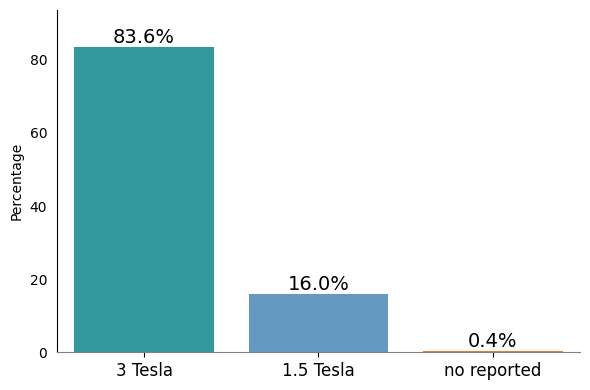

In [248]:
df = pd.DataFrame({feature:array})
df[feature] = df[feature].map({1.5: '1.5 Tesla', 3: '3 Tesla', 0:'no reported'})

# Calculate percentages
percentages = df[feature].value_counts(normalize=True) * 100
percentages_df = percentages.reset_index()
percentages_df.columns = [feature, 'Percentage']

# Define colors for each bar
bar_colors = ['#20A8AD',"#559BD1" ,'#ff7f0e']  # Custom colors for Male and Female

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=percentages_df, 
    x=feature, 
    y='Percentage', 
    palette=bar_colors,  # Apply colors
    edgecolor='none',  # Add a border color
    linewidth=1.5       # Thickness of the border
)

# Add labels
for i, value in enumerate(percentages_df['Percentage']):
    ax.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=14)

# Customize appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='y', left=False)
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(fontsize=12)
#plt.yticks([])  # Remove y-axis ticks
plt.ylim(0, max(percentages_df['Percentage']) + 10)

# Show the plot
plt.tight_layout()
# Save the plot as a PNG file
plt.savefig("MRIField_plot.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

/tmp/ipykernel_823/2154792523.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


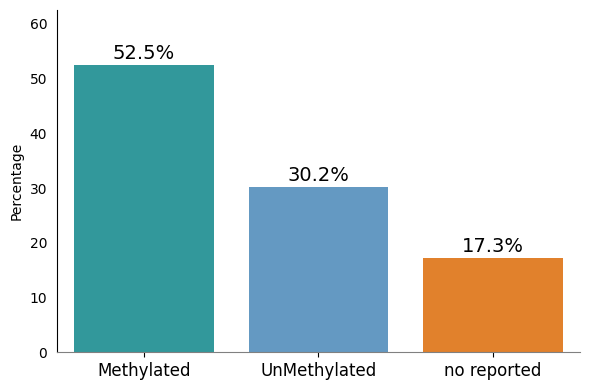

In [211]:
df = pd.DataFrame({feature:array})
df[feature] = df[feature].map({1: 'Methylated', 0: 'UnMethylated', 3:'no reported'})

# Calculate percentages
percentages = df[feature].value_counts(normalize=True) * 100
percentages_df = percentages.reset_index()
percentages_df.columns = [feature, 'Percentage']

# Define colors for each bar
bar_colors = ['#20A8AD',"#559BD1" ,'#ff7f0e']  # Custom colors for Male and Female

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=percentages_df, 
    x=feature, 
    y='Percentage', 
    palette=bar_colors,  # Apply colors
    edgecolor='none',  # Add a border color
    linewidth=1.5       # Thickness of the border
)

# Add labels
for i, value in enumerate(percentages_df['Percentage']):
    ax.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=14)

# Customize appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='y', left=False)
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(fontsize=12)
#plt.yticks([])  # Remove y-axis ticks
plt.ylim(0, max(percentages_df['Percentage']) + 10)

# Show the plot
plt.tight_layout()
# Save the plot as a PNG file
plt.savefig("MGMT_percentage_plot.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

/tmp/ipykernel_823/1764191169.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


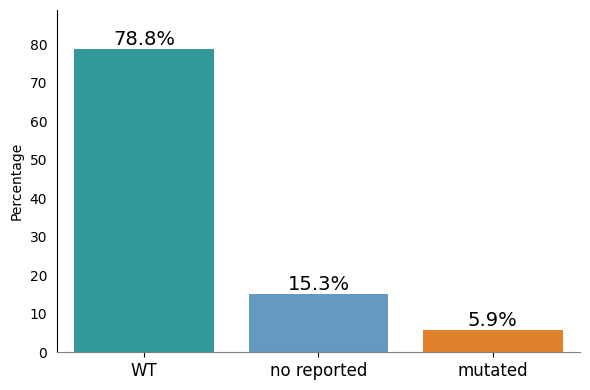

In [208]:
df = pd.DataFrame({feature:array})
df[feature] = df[feature].map({1: 'WT', 2: 'mutated', 3:'no reported'})

# Calculate percentages
percentages = df[feature].value_counts(normalize=True) * 100
percentages_df = percentages.reset_index()
percentages_df.columns = [feature, 'Percentage']

# Define colors for each bar
bar_colors = ['#20A8AD',"#559BD1" ,'#ff7f0e']  # Custom colors for Male and Female

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=percentages_df, 
    x=feature, 
    y='Percentage', 
    palette=bar_colors,  # Apply colors
    edgecolor='none',  # Add a border color
    linewidth=1.5       # Thickness of the border
)

# Add labels
for i, value in enumerate(percentages_df['Percentage']):
    ax.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=14)

# Customize appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='y', left=False)
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(fontsize=12)
#plt.yticks([])  # Remove y-axis ticks
plt.ylim(0, max(percentages_df['Percentage']) + 10)

# Show the plot
plt.tight_layout()
# Save the plot as a PNG file
plt.savefig("IDH_plot.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

/tmp/ipykernel_823/449026819.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


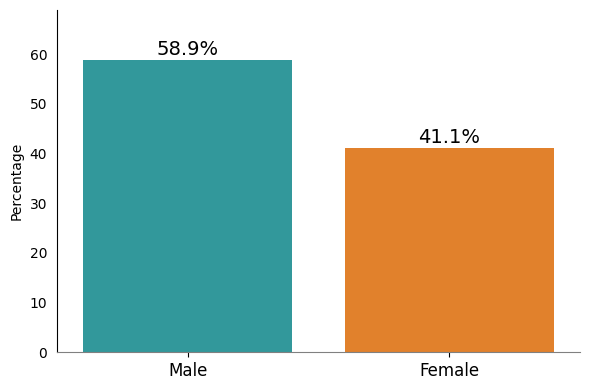

In [204]:
df = pd.DataFrame({'Gender':array})
df['Gender'] = df['Gender'].map({0: 'Male', 1: 'Female'})

# Calculate percentages
percentages = df['Gender'].value_counts(normalize=True) * 100
percentages_df = percentages.reset_index()
percentages_df.columns = ['Gender', 'Percentage']

# Define colors for each bar
bar_colors = ['#20A8AD', '#ff7f0e']  # Custom colors for Male and Female

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=percentages_df, 
    x='Gender', 
    y='Percentage', 
    palette=bar_colors,  # Apply colors
    edgecolor='none',  # Add a border color
    linewidth=1.5       # Thickness of the border
)

# Add labels
for i, value in enumerate(percentages_df['Percentage']):
    ax.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=14)

# Customize appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='y', left=False)
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(fontsize=12)
#plt.yticks([])  # Remove y-axis ticks
plt.ylim(0, max(percentages_df['Percentage']) + 10)

# Show the plot
plt.tight_layout()
# Save the plot as a PNG file
plt.savefig("gender_percentage_plot.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [192]:
df

,Gender
0,Male
1,Female
2,Male
3,Male
4,Female
...,...
649,Male
650,Male
651,Male
652,Male


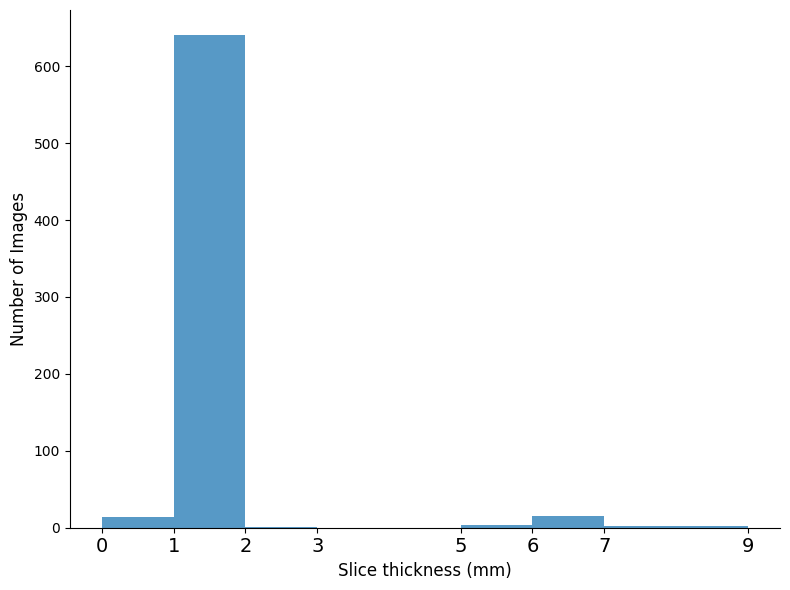

In [177]:
path="/app/Data/_Brain/Radiology/_Adult/_Glioma/_MRQy_temp/All_merged_raw/All_T1c_IQM.csv"
feature='VRZ'
df_path=pd.read_csv(path)
array=df_path[feature].tolist()
array=np.array(array).flatten()
data = pd.DataFrame({
    feature: array})

percentages = data[feature].value_counts(normalize=True) * 100
percentages_df = percentages.reset_index()
# # percentages_df.columns = ['Gender', 'Percentage']

# Custom bin edges
bins = [0, 1,2, 3, 5,6,7, 9]

# Create the histogram
plt.figure(figsize=(8, 6))
ax=sns.histplot(data[feature], bins=bins, kde=False, edgecolor="none")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Label the plot
plt.xlabel('Slice thickness (mm)', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(bins,fontsize=14)  # Set x-axis ticks at the bin edges
#plt.grid(axis='y', alpha=0.7)

# Show the plot
plt.tight_layout()
# Save the plot as a PNG file
plt.savefig("slice thick_plot.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [171]:
pd.DataFrame(percentages)

,VRZ
1.00,89.497041
1.50,4.142012
6.00,1.331361
0.90,1.035503
6.50,0.887574
1.20,0.591716
0.70,0.295858
0.94,0.295858
7.00,0.295858
5.00,0.295858
